<a href="https://www.kaggle.com/code/aleksandrmorozov123/natural-language-processing?scriptVersionId=96280792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


**Natural Language Processing - step by step**

In [2]:
# import required libraries
import numpy as np
import json
import pandas as pd

In [3]:
# read the data
df = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
df.head (5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**Lowercase**

In [4]:
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x.lower () for x in x.split ()))
df['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

**Remove punctuation**

In [5]:
df ['tweet'] = df['tweet'].str.replace (r"""[^\w\s]+""","")

df['tweet']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone to see t...
2        safe ways to heal your acne altwaystoheal heal...
3        is the hp and the cursed child book up for res...
4        3rd bihday to my amazing hilarious nephew eli ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like a mermaid ð hairflip neverready f...
17194    hillary campaigned today in ohioomg amp used w...
17195    happy at work conference right mindset leads t...
17196    my song so glad free download shoegaze newmusi...
Name: tweet, Length: 17197, dtype: object

**Removing stop words**

In [6]:
import nltk
from nltk.corpus import stopwords

# remove stop words
stop = stopwords.words ('english')
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x for x in x.split () if x not in stop))
df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see new ...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Tokenizing step**

In [7]:
from textblob import TextBlob
TextBlob (df['tweet'][3]).words

WordList(['hp', 'cursed', 'child', 'book', 'reservations', 'already', 'yes', 'ððð', 'harrypotter', 'pottermore', 'favorite'])

**Stemming**

In [8]:
from nltk.stem import PorterStemmer
st = PorterStemmer ()
df['tweet'][:5].apply (lambda x: " ".join ([st.stem(word) for word in x.split ()]))

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon see new â ...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye ððð harry...
4    3rd bihday amaz hilari nephew eli ahmir uncl d...
Name: tweet, dtype: object

**Lemmatizing**

In [9]:
from textblob import Word

df['tweet'] = df['tweet'].apply (lambda x: " ".join ([Word(word).
                                                     lemmatize () for word in x.split ()]))

df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacist want everyone see new â...
2         safe way heal acne altwaystoheal healthy healing
3        hp cursed child book reservation already yes ð...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Exploring text data**

In [10]:
# import required libraries

import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# computer the frequency of all words
frequency_dist = nltk.FreqDist (df['tweet'])
frequency_dist

FreqDist({'model love u take u time urð ðððð ððð': 170, 'finally found way delete old tweet might find useful well deletetweets': 43, 'aww yeah good bing bong bing bong': 32, 'im grateful affirmation': 31, 'happy work conference right mindset lead cultureofdevelopment organization work mindset': 31, 'lighttherapy help depression altwaystoheal healthy happy': 27, 'user feminismiscancer feminismisterrorism feminismmuktbharat malevote ignored user': 20, 'might libtard libtard sjw liberal politics': 16, 'ð love instagood photooftheday toptags tbt cute beautiful followme followâ': 16, 'save logins x broker change meme love education university': 14, ...})

In [11]:
sorted_frequency_dist = sorted (frequency_dist, key = frequency_dist.__getitem__, reverse = True)
sorted_frequency_dist

['model love u take u time urð ðððð ððð',
 'finally found way delete old tweet might find useful well deletetweets',
 'aww yeah good bing bong bing bong',
 'im grateful affirmation',
 'happy work conference right mindset lead cultureofdevelopment organization work mindset',
 'lighttherapy help depression altwaystoheal healthy happy',
 'user feminismiscancer feminismisterrorism feminismmuktbharat malevote ignored user',
 'might libtard libtard sjw liberal politics',
 'ð love instagood photooftheday toptags tbt cute beautiful followme followâ',
 'save logins x broker change meme love education university',
 'best essentialoils anxiety healthy peace altwaystoheal',
 'get get get enjoy music today free apps free music',
 'lighttherapy help sad depression altwaystoheal healthy',
 'user might libtard libtard sjw liberal politics',
 'people arent protesting trump republican wonthey trump fuhered ampâ',
 '100 amazing health benefit cucumber healthy altwaystoheal',
 'lover stop angry visit usgt

**Consider words with lengh greater than 5 and plot**

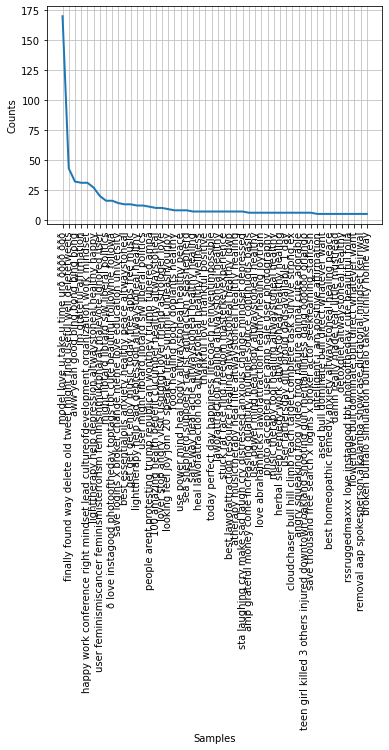

In [12]:
large_words = dict ([(k, v) for k, v in frequency_dist.items () if len (k) > 5])
frequency_dist = nltk.FreqDist (large_words)
frequency_dist.plot (50, cumulative = False)

**Build wordcloud**

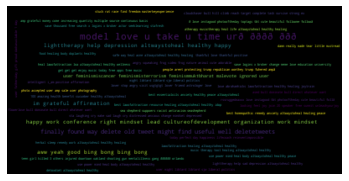

In [13]:
from wordcloud import WordCloud
tcloud = WordCloud ().generate_from_frequencies (frequency_dist)

# plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow (tcloud, interpolation = 'bilinear')
plt.axis ("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show ()

**Building a text preprocessing pipeline**

In [14]:
# read the data
dtweet = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
dtweet = dtweet ['tweet']

In [15]:
# write the function to process the tweets
def processRow (row):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    dtweet = row
    #lower case
    dtweet.lower()
    #removes unicode strings like '\u002c' and 'x96'
    dtweet = re.sub (r"""(\\u[0-9A-Fa-f]+)',r""", dtweet)
    dtweet = resub (r"""[^\x00-\x7f]', r""", dtweet)
    # conver any url to URL
    dtweet = re.sub("""(www\.[^\s]+)|(htpps?://[^\s]+)""", 'URL', dtweet)
    # convert any @Username to "AT_USER"
    dtweet = re.sub("""@[^\s]+""", 'AT_USER', dtweet)
    # remove additional white spaces
    dtweet = re.sub ("""[\s]+""", ' ', dtweet) 
    dtweet = re.sub ("""[\n]+""", ' ', dtweet)
    # remove not alphanumeric symbols white spaces
    dtweet = re.sub (r"""[^\w]""", ' ', dtweet)
    # remove hashtag in front of a word """
    dtweet = re.sub (r"""#([^\s]+)""", r"""\1""", dtweet)
    # replace #word with word
    dtweet = re.sub (r"""#([^\s]+)""", r"""\1""", dtweet)
    # remove :( or :)
    dtweet = dtweet.replace (""":)",""")
    dtweet = dtweet.replace (""":(",""")